mostly clean up, some exploratory analysis too

# Imports

In [1]:
import os
import numpy as np
import pandas as pd
import datetime
import csv
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

# Import (& some prelim clean up)

In [2]:
#import dataset
users = pd.read_csv(os.path.join('datasets', 'train_users_2.csv'), index_col = 'id')

#renaming a few things
users.rename(columns = {'date_account_created' : 'account', 'timestamp_first_active' : 'active', 
                     'date_first_booking': 'booked'}, inplace=True)

users.head()

,account,active,booked,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
id,,,,,,,,,,,,,,,
gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


# Investigating Columns

#### Datatypes
Clean up dates

In [3]:
users.dtypes

account                     object
active                       int64
booked                      object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

#### Counts
Lots of NaN in `booked`, some in `age`, and `first_affiliate_tracked`

In [4]:
users.count()

account                    213451
active                     213451
booked                      88908
gender                     213451
age                        125461
signup_method              213451
signup_flow                213451
language                   213451
affiliate_channel          213451
affiliate_provider         213451
first_affiliate_tracked    207386
signup_app                 213451
first_device_type          213451
first_browser              213451
country_destination        213451
dtype: int64

## Let the clean up begin...

###Lets look at dates 

In [5]:
#convert to datetime type
users['account'] = pd.to_datetime(users['account'])
users['booked'] = pd.to_datetime(users['booked'])
users['active'] = pd.to_datetime(users['active'], format='%Y%m%d%H%M%S')

In [6]:
users.dtypes

account                    datetime64[ns]
active                     datetime64[ns]
booked                     datetime64[ns]
gender                             object
age                               float64
signup_method                      object
signup_flow                         int64
language                           object
affiliate_channel                  object
affiliate_provider                 object
first_affiliate_tracked            object
signup_app                         object
first_device_type                  object
first_browser                      object
country_destination                object
dtype: object

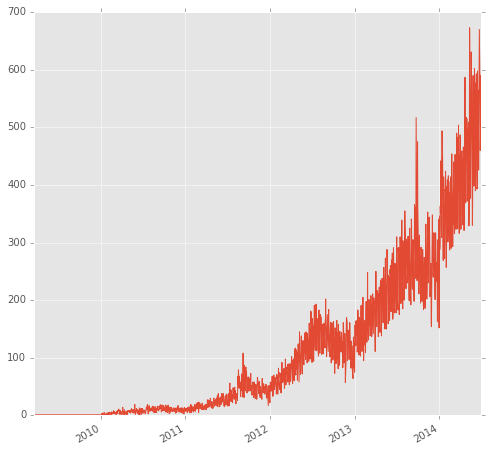

In [15]:
active = users.active.apply(lambda x: datetime.datetime(x.year, x.month, x.day))
active.value_counts().plot(kind='line', figsize = (8, 8))

In [27]:
users[users.active < pd.to_datetime(20130101, format='%Y%m%d')]

,account,active,booked,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
id,,,,,,,,,,,,,,,
gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
osr2jwljor,2010-01-01,2010-01-01 21:56:19,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
lsw9q7uk0j,2010-01-02,2010-01-02 01:25:58,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
0d01nltbrs,2010-01-03,2010-01-03 19:19:05,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
a1vcnhxeij,2010-01-04,2010-01-04 00:42:11,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US


#### Gender 
Drop `-unknown-` (user didn't specify gender)

In [5]:
users.gender.value_counts()

-unknown-    95688
FEMALE       63041
MALE         54440
OTHER          282
Name: gender, dtype: int64

In [6]:
users = users[users.gender !='-unknown-']

users.gender.value_counts()

FEMALE    63041
MALE      54440
OTHER       282
Name: gender, dtype: int64

#### Age
Drop ages under 18 and over 100

In [7]:
#basic stats - standard deviation is pretty high, also wacky min and max ages
users.age.describe()

count    108618.000000
mean         50.116408
std         160.393193
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64

In [8]:
#checking NaNs 
users.age.isnull().sum()

9145

In [9]:
#checking under 18
sum(users.age < 18)

137

In [10]:
#just double checking my code ;)
users[ users.age < 18 ]

,account,active,booked,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
id,,,,,,,,,,,,,,,
3qsa4lo7eg,2010-03-06,20100306184019,2010-03-08,FEMALE,5.0,basic,3,en,sem-non-brand,google,NaN,Web,Other/Unknown,-unknown-,FR
rzhouzy2ok,2010-04-29,20100429161617,2010-04-29,FEMALE,5.0,facebook,0,en,other,craigslist,tracked-other,Web,Mac Desktop,Safari,IT
593gkcul8c,2010-05-24,20100524042738,NaN,FEMALE,5.0,facebook,2,en,direct,direct,untracked,Web,Mac Desktop,Safari,NDF
tu2iorbez0,2010-06-07,20100607173548,NaN,MALE,5.0,facebook,2,en,other,craigslist,untracked,Web,Mac Desktop,Safari,NDF
4395zaz8fe,2010-06-07,20100607235738,NaN,MALE,5.0,facebook,2,en,content,google,linked,Web,Windows Desktop,IE,NDF
ceum3xl08h,2010-06-14,20100614171620,NaN,MALE,5.0,facebook,2,en,direct,direct,NaN,Web,Other/Unknown,-unknown-,NDF
s016mu0c9w,2010-06-16,20100616151810,NaN,FEMALE,5.0,facebook,2,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
jd2rvmhc87,2010-06-19,20100619223752,2010-06-22,MALE,5.0,facebook,3,en,direct,direct,untracked,Web,Windows Desktop,Chrome,US
ep67tiywda,2010-06-23,20100623061552,NaN,FEMALE,5.0,facebook,3,en,sem-non-brand,vast,linked,Web,Android Phone,Android Browser,NDF


In [11]:
#checking over 100
sum(users.age > 100)

1641

In [12]:
#setting over 100 & under 18 to NaN
users.loc[users.age > 100, 'age'] = np.nan
users.loc[users.age < 18, 'age'] = np.nan

In [13]:
#checking NaNs again to check the math
users.age.isnull().sum()

10923

In [14]:
#this looks better now
users.age.describe()

count    106840.000000
mean         36.519543
std          11.619237
min          18.000000
25%          28.000000
50%          33.000000
75%          42.000000
max         100.000000
Name: age, dtype: float64

#### Signup Method
Nothing to do here... did consider dropping Google but doesn't feel right

In [15]:
users.signup_method.value_counts()

basic       59142
facebook    58520
google        101
Name: signup_method, dtype: int64

#### Signup Flow
Hmmm looks like we got some outliers - maybe plotting will help? Not sure if I should get rid of them or not...

In [16]:
users.signup_flow.value_counts()

0     92638
12     7096
3      5603
25     4899
2      3920
24     1605
23      825
1       641
21      193
6       143
8       136
5        33
20       14
16       11
15        4
4         1
10        1
Name: signup_flow, dtype: int64

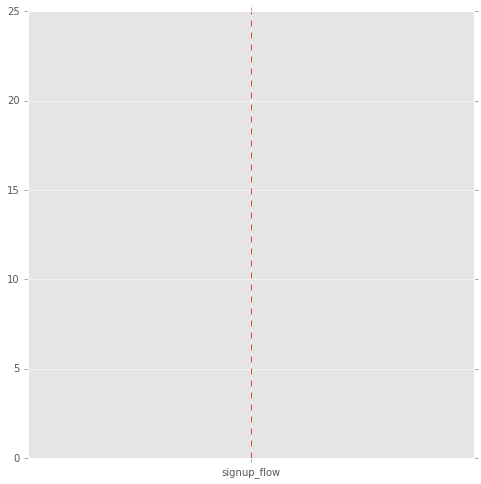

In [17]:
#why doesn't this work?
users.signup_flow.plot(kind = 'box', figsize = (8, 8))

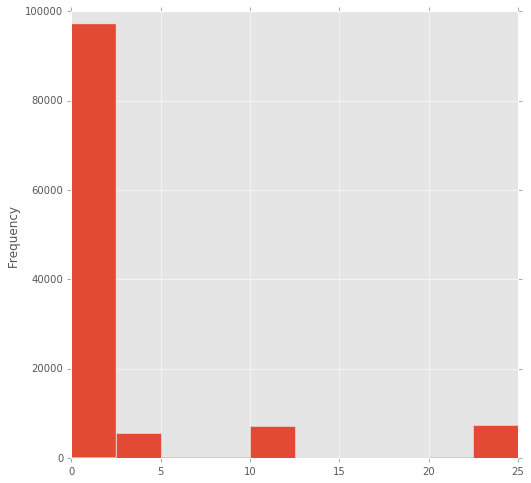

In [18]:
users.signup_flow.plot(kind = 'hist', figsize = (8, 8))

#### Language
Again some low values that I'm not sure whether to keep or not

In [19]:
users.language.value_counts()

en    113359
zh       860
fr       802
es       630
ko       395
de       390
it       365
ru       275
pt       173
ja       132
sv        80
nl        48
tr        42
pl        41
da        35
no        21
el        21
cs        20
th        18
id        18
hu        17
fi        11
ca         4
is         4
hr         2
Name: language, dtype: int64

#### Affiliate Channel
This looks fine... but potentially could regroup to simply `direct` and clump everything else into `other`

In [20]:
users.affiliate_channel.value_counts()

direct           74437
sem-brand        14071
sem-non-brand     9844
api               6383
other             5462
seo               4967
content           2027
remarketing        572
Name: affiliate_channel, dtype: int64

### Affiliate Provider
Combine `facebook-open-graph` with `facebook`

In [21]:
users.affiliate_provider.value_counts()

direct                 74294
google                 27542
other                   9104
craigslist              2128
facebook                1580
bing                    1199
padmapper                428
facebook-open-graph      405
vast                     389
yahoo                    252
gsp                      183
meetup                   134
email-marketing           70
naver                     24
yandex                    14
baidu                     14
wayn                       3
Name: affiliate_provider, dtype: int64

In [22]:
users.affiliate_provider = users.affiliate_provider.str.replace('facebook-open-graph','facebook')

In [23]:
users.affiliate_provider.value_counts()

direct             74294
google             27542
other               9104
craigslist          2128
facebook            1985
bing                1199
padmapper            428
vast                 389
yahoo                252
gsp                  183
meetup               134
email-marketing       70
naver                 24
yandex                14
baidu                 14
wayn                   3
Name: affiliate_provider, dtype: int64

#### First Affiliate Tracked
Drop `untracked`

In [24]:
users.first_affiliate_tracked.value_counts()

untracked        60216
linked           27073
omg              23588
tracked-other     3804
product            803
marketing           94
local ops           25
Name: first_affiliate_tracked, dtype: int64

In [25]:
users = users[users.first_affiliate_tracked !='untracked']

users.first_affiliate_tracked.value_counts()

linked           27073
omg              23588
tracked-other     3804
product            803
marketing           94
local ops           25
Name: first_affiliate_tracked, dtype: int64

#### Signup App 
Looks good

In [26]:
users.signup_app.value_counts()

Web        54758
iOS         1477
Moweb       1230
Android       82
Name: signup_app, dtype: int64

#### First Device Type
Drop `Other/Unknown`

In [27]:
users.first_device_type.value_counts()

Mac Desktop           28241
Windows Desktop       20854
iPad                   3974
Other/Unknown          2184
iPhone                 1391
Desktop (Other)         334
Android Phone           298
Android Tablet          261
SmartPhone (Other)       10
Name: first_device_type, dtype: int64

In [28]:
users = users[users.first_device_type !='Other/Unknown']

users.first_device_type.value_counts()

Mac Desktop           28241
Windows Desktop       20854
iPad                   3974
iPhone                 1391
Desktop (Other)         334
Android Phone           298
Android Tablet          261
SmartPhone (Other)       10
Name: first_device_type, dtype: int64

#### First Browser
Drop `unknown` but same issue here with low vales... also has the potential for grouping later on 

In [29]:
users.first_browser.value_counts()

Chrome                19609
Safari                14472
Firefox                9872
IE                     5484
Mobile Safari          5298
Chrome Mobile           198
Android Browser         168
Opera                    58
AOL Explorer             52
Silk                     35
Maxthon                  18
Chromium                 15
BlackBerry Browser       10
RockMelt                  9
-unknown-                 8
Yandex.Browser            8
Iron                      7
Sogou Explorer            5
Mobile Firefox            5
Apple Mail                4
IceWeasel                 4
IE Mobile                 3
Pale Moon                 3
SiteKiosk                 3
CoolNovo                  2
TenFourFox                2
Avant Browser             2
TheWorld Browser          2
SlimBrowser               1
wOSBrowser                1
SeaMonkey                 1
Stainless                 1
Camino                    1
Mozilla                   1
CometBird                 1
Name: first_browser,

In [30]:
users = users[users.first_browser !='-unknown-']

users.first_browser.value_counts()

Chrome                19609
Safari                14472
Firefox                9872
IE                     5484
Mobile Safari          5298
Chrome Mobile           198
Android Browser         168
Opera                    58
AOL Explorer             52
Silk                     35
Maxthon                  18
Chromium                 15
BlackBerry Browser       10
RockMelt                  9
Yandex.Browser            8
Iron                      7
Sogou Explorer            5
Mobile Firefox            5
Apple Mail                4
IceWeasel                 4
SiteKiosk                 3
Pale Moon                 3
IE Mobile                 3
TheWorld Browser          2
TenFourFox                2
CoolNovo                  2
Avant Browser             2
SlimBrowser               1
SeaMonkey                 1
Stainless                 1
Camino                    1
Mozilla                   1
CometBird                 1
wOSBrowser                1
Name: first_browser, dtype: int64

#### Country Destination
According to some research I've done NDF value here means the user has not yet booked? Weird, though I guess it could explain why the `booked` column had so many NaNs. So I guess I'll get rid of it

In [31]:
users.country_destination.value_counts()

NDF      28346
US       19028
other     3016
FR        1496
IT         808
GB         732
ES         694
CA         406
DE         353
NL         238
AU         167
PT          71
Name: country_destination, dtype: int64

In [32]:
users = users[users.country_destination !='NDF']

users.country_destination.value_counts()

US       19028
other     3016
FR        1496
IT         808
GB         732
ES         694
CA         406
DE         353
NL         238
AU         167
PT          71
Name: country_destination, dtype: int64

/Users/VanessaG/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:2787: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=719163.0, right=719163.0
  'left=%s, right=%s') % (left, right))


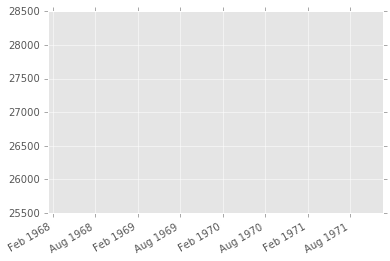

In [34]:
active = users.active.apply(lambda x: datetime.datetime(x.year, x.month, x.day))
active.value_counts().plot(kind='line', linewidth=1.2, color='#FD5C64')

#### How much data have we lost?
Answer: a lot

In [33]:
users.count()

account                    27009
active                     27009
booked                     27009
gender                     27009
age                        25037
signup_method              27009
signup_flow                27009
language                   27009
affiliate_channel          27009
affiliate_provider         27009
first_affiliate_tracked    27009
signup_app                 27009
first_device_type          27009
first_browser              27009
country_destination        27009
dtype: int64

#### About to lose a little more

In [34]:
#drop all remaining NaN 
users.dropna(inplace = True, subset = ['account','active','booked','gender','age','first_affiliate_tracked'])

users.count()

account                    25037
active                     25037
booked                     25037
gender                     25037
age                        25037
signup_method              25037
signup_flow                25037
language                   25037
affiliate_channel          25037
affiliate_provider         25037
first_affiliate_tracked    25037
signup_app                 25037
first_device_type          25037
first_browser              25037
country_destination        25037
dtype: int64

In [35]:
#data lost
((213451.00-25037.00)/213451.00)*100

88.27037587080876

# Export to CSV

Will continue clean up & exploratory analysis in new notebook 

In [40]:
users.to_csv(os.path.join('datasets', 'airbnb_clean.csv'), index_label = 'ID')